In [25]:
import numpy as np
np.random.seed(7)
from keras.models import load_model
from tools import *
from localizer import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

In [7]:
model = load_model('../models/lab_xyQ.hdf5')
lab_loc = localizer()
lab_loc.load_profile('lab_profile')
X_train, y_train, X_test, y_test = load_data_from_folder('../datasets', lab_loc.profile, train_test_split=0.8, keep_percent=1.0, 
                             item='rssi')

shape_str = '{:10s} | {:15s} | {:15s}'
print(shape_str.format('', 'X shape', 'y shape'))
print(shape_str.format('TRAIN', str(X_train.shape), str(y_train.shape)))
print(shape_str.format('TEST', str(X_test.shape), str(y_test.shape)))

Loaded profile: lab_profile


2017-06-28_13:52 loaded
Loaded 1 files from ../datasets
           | X shape         | y shape        
TRAIN      | (720, 20)       | (720, 2)       
TEST       | (180, 20)       | (180, 2)       


In [8]:
color_map_iter = iter(cm.rainbow(np.linspace(0, 1, 9)))
colors = {}
for point in y_train:
    try: 
        colors[str(point)]
    except:
        colors[str(point)] = next(color_map_iter)

*Training Data*

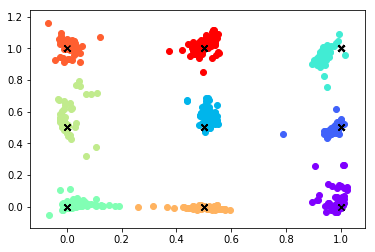

In [9]:
pred_train = model.predict(X_train)
for i, point in enumerate(pred_train):
    color = colors[str(y_train[i])]
    plt.scatter(point[0], point[1], color=color)
    plt.scatter(y_train[i, 0], y_train[i, 1], color='black', marker='x')
plt.show()

*Test Data*

Correct Predictions: 100/180 55.56%


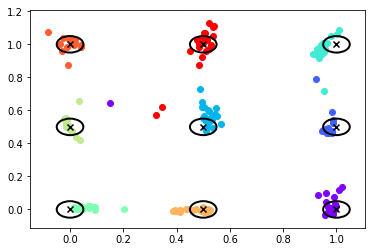

In [54]:
pred_test = model.predict(X_test)
correct_points = 0
eval_range = 0.05

for i, point in enumerate(pred_test):
    color = colors[str(y_test[i])]
    plt.scatter(point[0], point[1], color=color)
    x_diff = point[0] - y_test[i,0]
    y_diff = point[1] - y_test[i,1]
    dist = np.sqrt(np.square(x_diff) + np.square(y_diff))
    if dist < eval_range:
        correct_points += 1
ax = plt.gca()
for item in colors:
    points = item.strip('[]').split()
    plt.scatter(float(points[0]), float(points[1]), color='black', marker='x')
    rect = patches.Circle((float(points[0]), float(points[1])),
                          radius=eval_range,linewidth=2,edgecolor='k',facecolor='none')
    ax.add_patch(rect)
    
    
print('Correct Predictions: {}/{} {:.2f}%'.format(correct_points, len(pred_test), 
                                                  100*float(correct_points)/float(len(pred_test))))   
plt.show()